In [5]:
import torch
import numpy as np
import json
from lime import lime_image
from numba.cpython.slicing import slice_constructor_impl
from skimage.segmentation import quickshift, mark_boundaries, slic
from ultralytics import YOLO
from datasets import load_dataset
from PIL import Image
import matplotlib.pyplot as plt

In [6]:

def transform_image(image):
    """Ensure image is in RGB format."""
    if image.mode != "RGB":
        image = image.convert("RGB")
    return np.array(image)


def yolo_predict(image_np, model):
    """Performs YOLO inference and returns object detection results."""
    if image_np.shape[-1] != 3:
        raise ValueError("Expected an RGB image with shape (H, W, 3)")

    image_pil = Image.fromarray(image_np.astype(np.uint8))  # Ensure proper dtype
    results = model(image_pil)

    if len(results[0].boxes) > 0:
        boxes = results[0].boxes.xyxy.cpu().numpy()  # Bounding box coordinates
        classes = results[0].boxes.cls.cpu().numpy()  # Class IDs
        scores = results[0].boxes.conf.cpu().numpy()  # Confidence scores
        return boxes, classes, scores
    else:
        return [], [], []  # No detections


def surrogate_classifier(images_np, model):
    """Generate a surrogate classifier's output based on detected objects."""
    outputs = []
    for image_np in images_np:
        try:
            boxes, classes, scores = yolo_predict(image_np, model)
            output = np.zeros(len(model.names))  # Initialize output for all classes
            for class_id, score in zip(classes, scores):
                output[int(class_id)] = score  # Assign confidence scores to detected classes
            outputs.append(output)
        except Exception as e:
            print(f"Error processing image: {e}")
            outputs.append(np.zeros(len(model.names)))  # Return zero scores if error
    return np.array(outputs)


Processing image 105


  0%|          | 0/1000 [00:00<?, ?it/s]


0: 480x640 1 Malignant, 172.3ms
Speed: 5.2ms preprocess, 172.3ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 190.0ms
Speed: 3.6ms preprocess, 190.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 164.4ms
Speed: 3.7ms preprocess, 164.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Malignant, 144.8ms
Speed: 2.2ms preprocess, 144.8ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 170.5ms
Speed: 5.1ms preprocess, 170.5ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 174.4ms
Speed: 4.2ms preprocess, 174.4ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 177.9ms
Speed: 3.7ms preprocess, 177.9ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 152.4ms
Speed: 2.2ms preprocess, 152.4

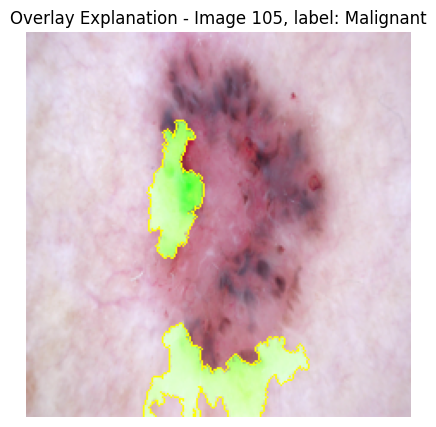

Size of image:  (224, 224, 3)
Processing image 54


  0%|          | 0/1000 [00:00<?, ?it/s]


0: 480x640 1 Benign, 1 Malignant, 173.6ms
Speed: 1.1ms preprocess, 173.6ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 169.7ms
Speed: 1.8ms preprocess, 169.7ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 131.9ms
Speed: 2.0ms preprocess, 131.9ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 138.5ms
Speed: 1.7ms preprocess, 138.5ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 131.4ms
Speed: 1.8ms preprocess, 131.4ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 124.7ms
Speed: 1.6ms preprocess, 124.7ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 111.8ms
Speed: 2.4ms preprocess, 111.8ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 106.3ms
Speed: 2.2ms

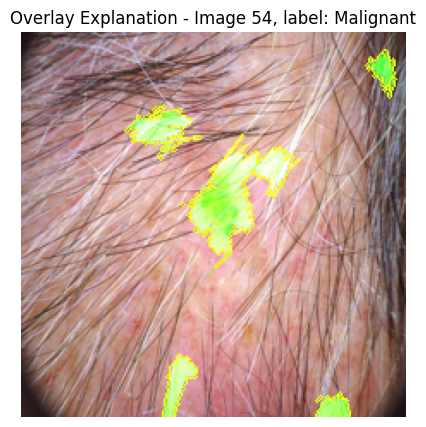

Size of image:  (224, 224, 3)
Processing image 209


  0%|          | 0/1000 [00:00<?, ?it/s]


0: 480x640 1 Benign, 171.2ms
Speed: 1.4ms preprocess, 171.2ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 173.5ms
Speed: 2.2ms preprocess, 173.5ms inference, 0.9ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 178.1ms
Speed: 3.8ms preprocess, 178.1ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 175.4ms
Speed: 3.9ms preprocess, 175.4ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 133.2ms
Speed: 1.9ms preprocess, 133.2ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 166.1ms
Speed: 2.6ms preprocess, 166.1ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 Benigns, 122.8ms
Speed: 4.1ms preprocess, 122.8ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 121.5ms
Speed: 1.5ms preprocess, 121.5ms infer

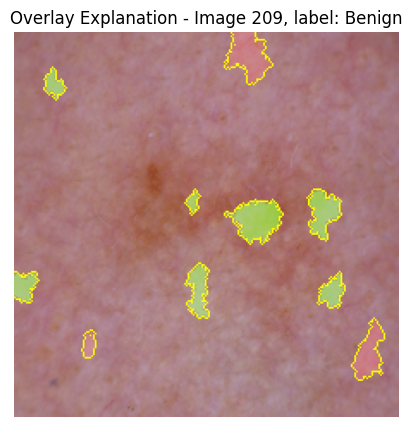

Size of image:  (224, 224, 3)
Processing image 211


  0%|          | 0/1000 [00:00<?, ?it/s]


0: 480x640 1 Benign, 159.0ms
Speed: 1.3ms preprocess, 159.0ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 157.3ms
Speed: 1.5ms preprocess, 157.3ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 149.8ms
Speed: 1.7ms preprocess, 149.8ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 109.5ms
Speed: 1.5ms preprocess, 109.5ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 85.6ms
Speed: 1.4ms preprocess, 85.6ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 85.2ms
Speed: 1.5ms preprocess, 85.2ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 85.1ms
Speed: 3.1ms preprocess, 85.1ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 79.6ms
Speed: 1.9ms preprocess, 79.6ms 

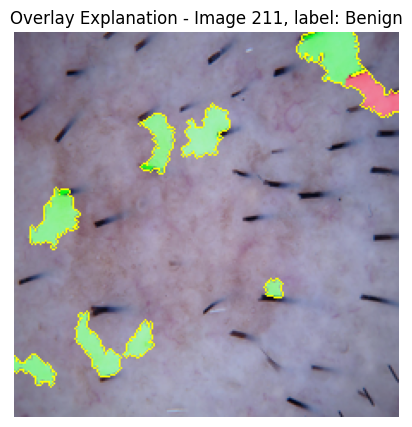

Size of image:  (224, 224, 3)
Processing image 118


  0%|          | 0/1000 [00:00<?, ?it/s]


0: 480x640 1 Benign, 160.3ms
Speed: 1.5ms preprocess, 160.3ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 160.9ms
Speed: 1.8ms preprocess, 160.9ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 160.0ms
Speed: 1.7ms preprocess, 160.0ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 142.6ms
Speed: 1.7ms preprocess, 142.6ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 127.5ms
Speed: 1.6ms preprocess, 127.5ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 118.6ms
Speed: 4.4ms preprocess, 118.6ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 93.6ms
Speed: 1.5ms preprocess, 93.6ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 84.7ms
Speed: 1.6ms preprocess, 84.

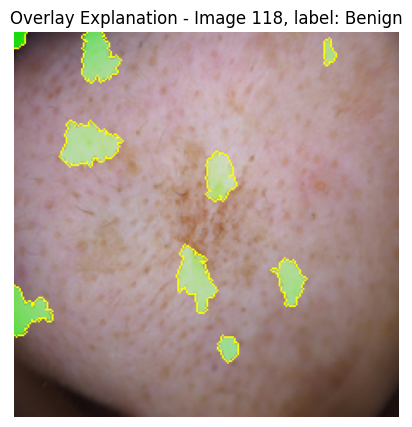

Size of image:  (224, 224, 3)
Processing image 88


  0%|          | 0/1000 [00:00<?, ?it/s]


0: 480x640 1 Benign, 1 Malignant, 155.1ms
Speed: 1.5ms preprocess, 155.1ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 157.2ms
Speed: 1.6ms preprocess, 157.2ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 154.6ms
Speed: 1.6ms preprocess, 154.6ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 133.4ms
Speed: 1.6ms preprocess, 133.4ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 105.0ms
Speed: 1.6ms preprocess, 105.0ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 85.2ms
Speed: 1.8ms preprocess, 85.2ms inference, 0.4ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 124.7ms
Speed: 1.7ms preprocess, 124.7ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 105.8ms
Speed: 2.1ms preproce

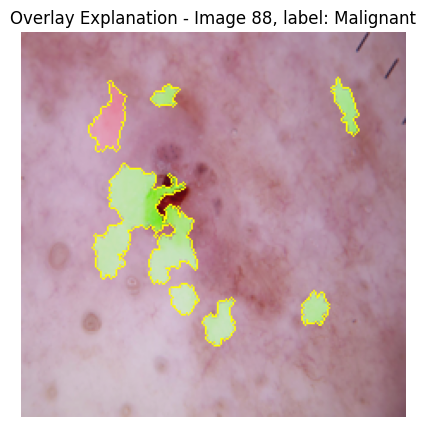

Size of image:  (224, 224, 3)
Processing image 30


  0%|          | 0/1000 [00:00<?, ?it/s]


0: 480x640 1 Malignant, 162.1ms
Speed: 1.4ms preprocess, 162.1ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Benign, 171.7ms
Speed: 1.6ms preprocess, 171.7ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 160.1ms
Speed: 1.6ms preprocess, 160.1ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 136.2ms
Speed: 1.6ms preprocess, 136.2ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 104.4ms
Speed: 1.6ms preprocess, 104.4ms inference, 0.5ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 163.2ms
Speed: 3.6ms preprocess, 163.2ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 120.2ms
Speed: 3.6ms preprocess, 120.2ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 125.6ms
Speed: 4.7ms preprocess, 125.

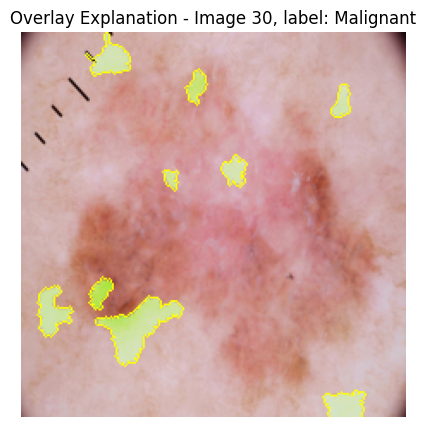

Size of image:  (224, 224, 3)
Done


In [9]:

label_mapping = {
    "melanoma": "Malignant",
    "melanocytic_Nevi": "Malignant",
    "dermatofibroma": "Benign",
    "basal_cell_carcinoma": "Malignant",
    "vascular_lesions": "Benign",
    "actinic_keratoses": "Malignant",
    "benign_keratosis-like_lesions": "Benign"
}
# Load the dataset
dataset = load_dataset("marmal88/skin_cancer")
test_split = dataset["test"]

# Load the YOLO model
model = YOLO("yolo_weights/yolov8SC.pt")  # Replace with your model path

true_positives = [104, 53,208, 210,117,87,29]
# Process and explain 10 images
for index in true_positives:
    print(f"Processing image {index + 1}")
    image = test_split[index]["image"]
    ground_truth = test_split[index]["dx"]
    truth = label_mapping[ground_truth]

    # Transform image for SODEx
    image_np = transform_image(image)

    # Initialize LIME explainer
    explainer = lime_image.LimeImageExplainer()
    explanation = explainer.explain_instance(
        image_np,
        lambda x: surrogate_classifier(x, model),
        top_labels=2,
        hide_color=0,
        num_samples=1000,
        segmentation_fn=lambda x: quickshift(x, kernel_size=4, max_dist=200)
        # segmentation_fn=lambda x: slic(x, n_segments=50, compactness=10)
    )


    # Get explanation mask
    image_explained, mask = explanation.get_image_and_mask(
        explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=False
    )
    image_explained2, mask2 = explanation.get_image_and_mask(
        explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False
    )

    # Resize the image and mask to 244x244
    image_explained2 = Image.fromarray(image_explained2).resize((224, 224))
    mask2 = Image.fromarray(mask2.astype(np.uint8)).resize((224, 224), Image.NEAREST)
    mask2 = np.array(mask2).astype(bool)

    # Overlay the explanation mask onto the original image
    overlay = mark_boundaries(np.array(image_explained2), mask2)

    # Plot only the overlay explanation
    plt.figure(figsize=(5, 5))
    plt.imshow(overlay)
    plt.title(f"Overlay Explanation - Image {index + 1}, label: {truth}")
    plt.axis("off")
    plt.savefig(f"results_lime/overlay_{index}.png")
    plt.show()

    print("Size of image: ", overlay.shape)
print("Done")